In [1]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))



Warning message:
"package 'readxl' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [12]:
library(ggplot2)
library(dplyr)


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [13]:
head(order_info_r)

order_no,item_id,reserv_no,quantity,sales
191228137840110010,M0003,2019122805,1,17000
191228137837810010,M0001,2019122806,10,240000
191228547385810010,M0003,2019122807,2,34000
191228567831310010,M0008,2019122808,1,10000
191228567430310010,M0005,2019122809,4,140000
191228137860010010,M0005,2019122810,2,70000


In [20]:
# 예약 번호(reserv_no)별로 매출 합계를 구함
total_amt <- order_info_r %>%
    group_by(reserv_no) %>%
    summarise(amt_daily = sum(sales/1000)) %>%
    arrange(reserv_no)

total_amt     # 데이터셋 확인

reserv_no,amt_daily
2019060301,140
2019060601,152
2019060701,48
2019061601,105
2019061801,48
2019062001,10
2019062201,48
2019062601,8
2019062901,54
2019070101,50


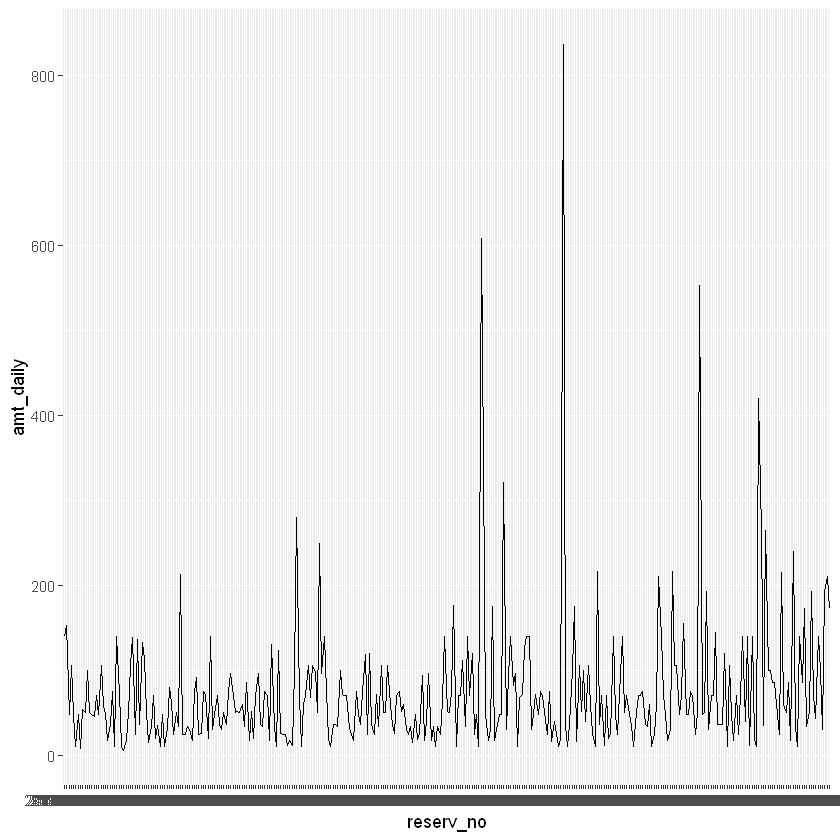

In [21]:
# 예약 번호(reserv_no) 순서를 x축으로 해서 선 그래프를 그림
ggplot(total_amt, aes(x = reserv_no, y = amt_daily, group = 1)) + geom_line()

In [ ]:
#----------------------월별로 더 간결하게 보기 ------------

In [14]:
# 예약 번호(reserv_no) 1~6번째 자리를 선택해서(월로 만듦) 그룹핑
total_amt <- order_info_r %>%
    mutate(month = substr(reserv_no, 1, 6)) %>%
    group_by(month) %>%
    summarise(amt_monthly = sum(sales/1000))

total_amt     # 데이터셋 확인

month,amt_monthly
201906,613
201907,1744
201908,1622
201909,1586
201910,3333
201911,5197
201912,10862


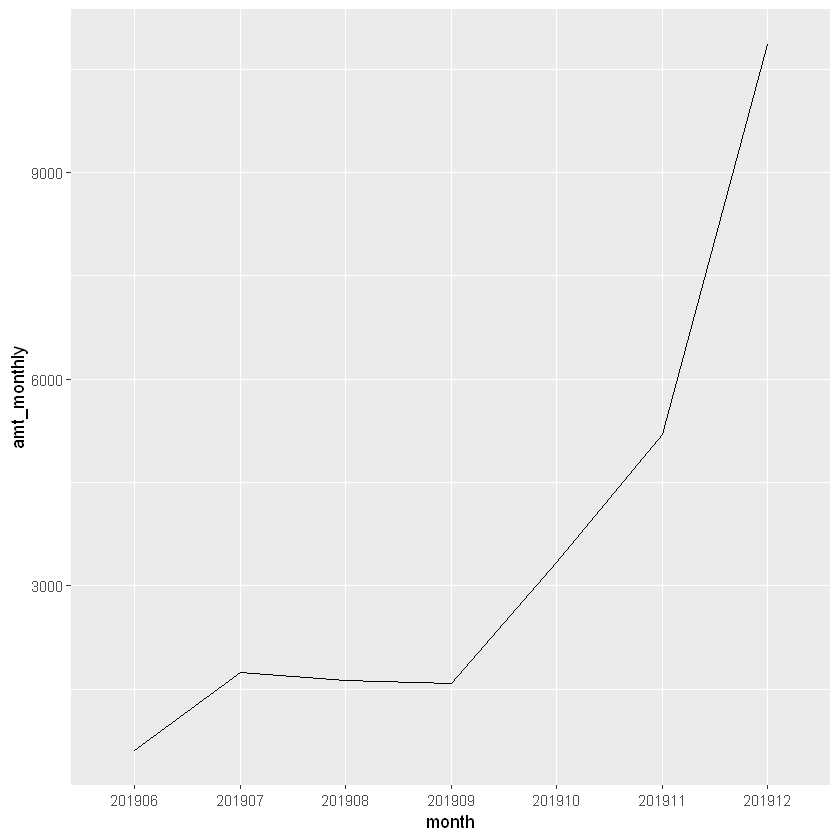

In [19]:
#월별 전체 매출 선 그래프
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) + geom_line()

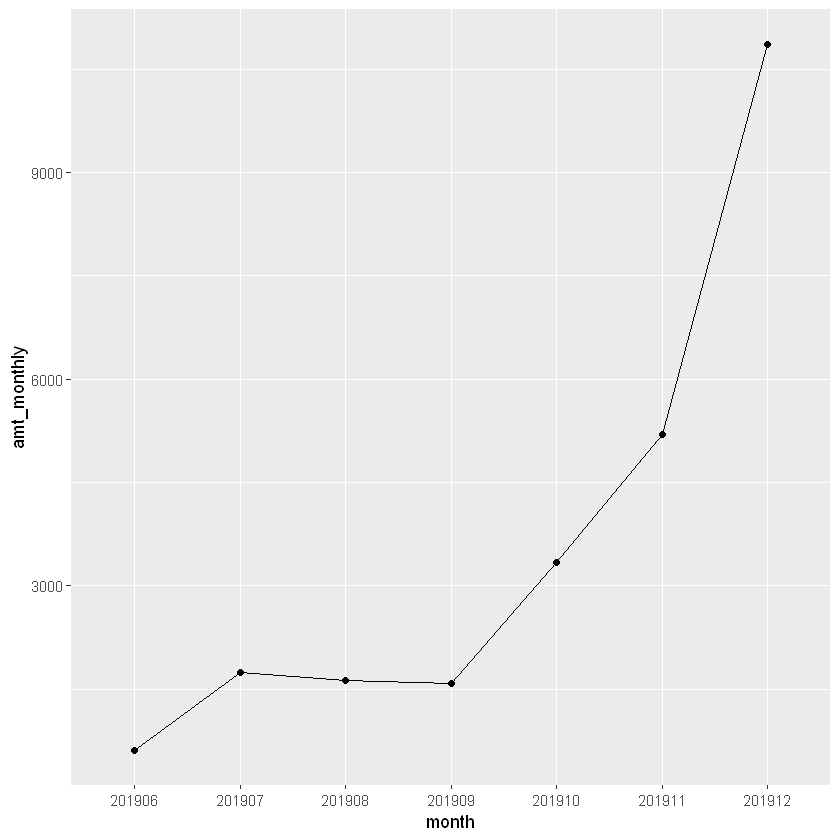

In [17]:
# 점 그리기
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) +
    geom_line() +
    geom_point()

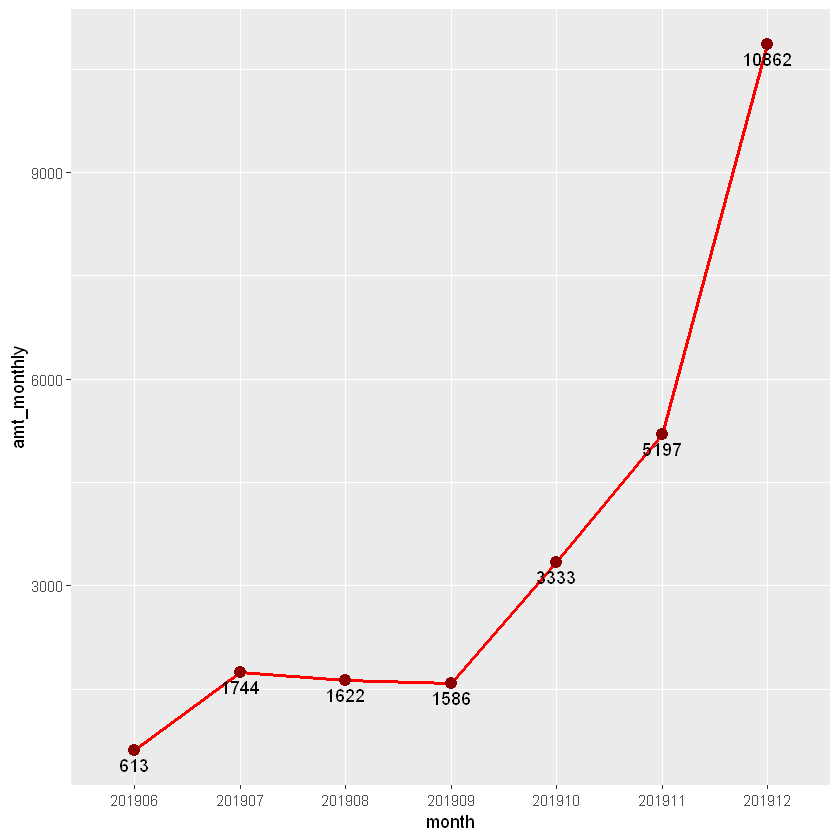

In [16]:
# 선 그래프 색상 추가, 레이블 (텍스트 데이터)추가

ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1, label = amt_monthly))+
    geom_line(color = "red", size = 1) +
    geom_point(color = "darkred", size = 3) +
    geom_text(vjust = 1.5, hjust = 0.5)


In [22]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [23]:
help(ToothGrowth)

In [24]:
df <- ToothGrowth  %>% 
group_by(dose) %>%                   #투여량별로 그룹화
summarise(sd=sd(len), len=mean(len)) #표준편차, 평균

df

dose,sd,len
0.5,4.499763,10.605
1.0,4.415436,19.735
2.0,3.774150,26.100


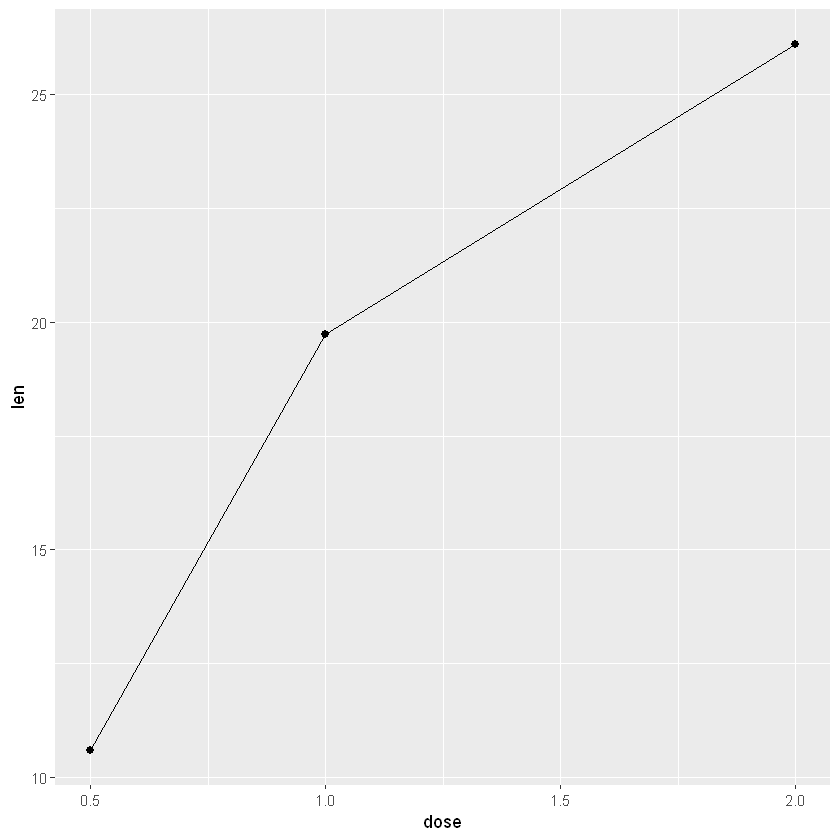

In [28]:
ggplot(df, aes(dose,len)) +
  geom_line(aes(group=1)) + #geom_line 그래프를 그릴때는 반드시 group을 지정해야 한다.
  geom_point(size=2)

In [29]:
# 그룹하나 더 추가

df2 <- ToothGrowth  %>% 
   group_by(dose, supp)  %>% 
   summarise(sd=sd(len), len=mean(len))  #sd :표준편차

In [30]:
df2

dose,supp,sd,len
0.5,OJ,4.459709,13.23
0.5,VC,2.746634,7.98
1.0,OJ,3.910953,22.70
1.0,VC,2.515309,16.77
2.0,OJ,2.655058,26.06
2.0,VC,4.797731,26.14


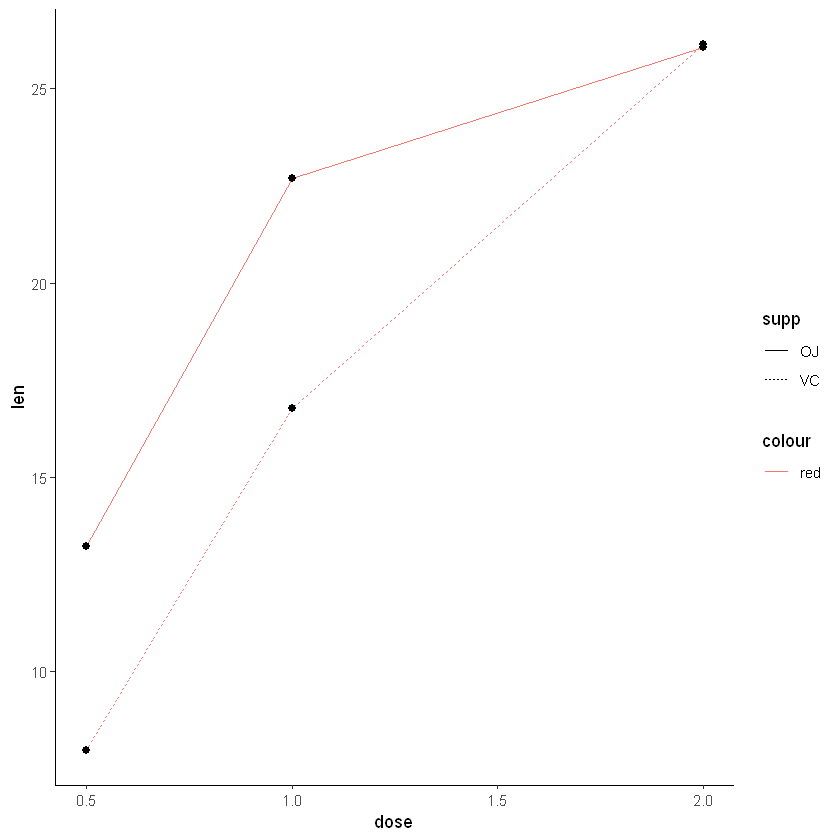

In [35]:
ggplot(df2,aes(dose,len)) +
    geom_line(aes(group=supp, linetype=supp,color = "red"))+ # linetype=supp, 선들을 알아서 다르게 표시하라.
    geom_point(size = 2) +
    theme_classic()  # 오른쪽에 범례 표시

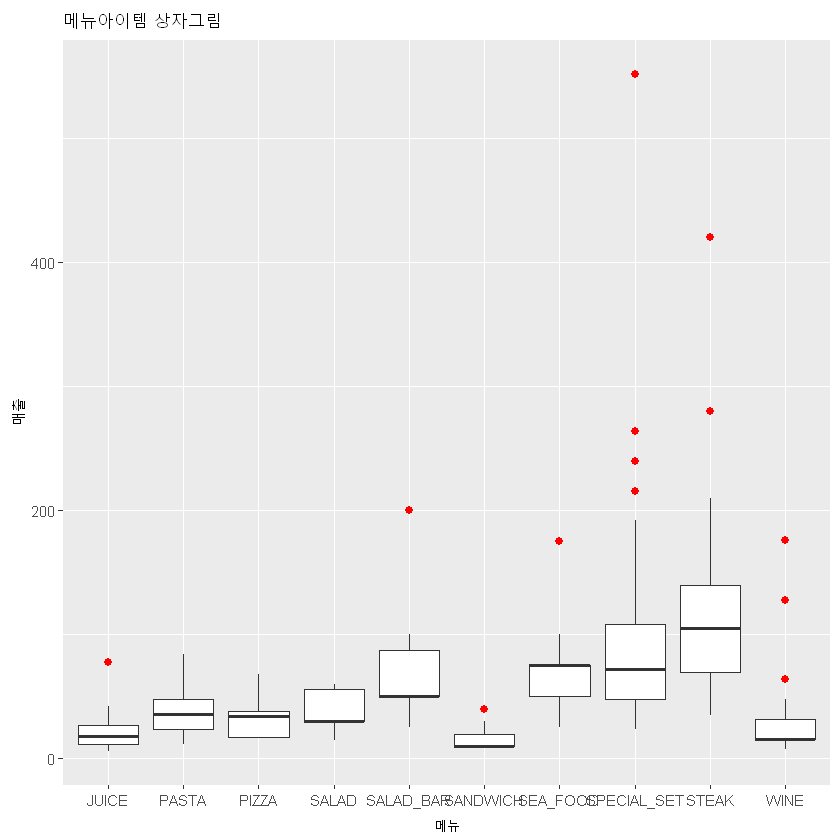

In [36]:
# 아이템 메뉴 이름 연결(조인)
df_boxplot_graph <- inner_join(order_info_r, item_r, by = "item_id")

# 상자 그림 그리기
ggplot(df_boxplot_graph, aes(x = product_name, y = sales/1000)) +
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red") +
    labs(title = "메뉴아이템 상자그림", x = "메뉴", y = "매출")